# Day 1
# Theory
## Exponential Growth
$$ \frac{dN}{dt} = kN $$
where $k$ is the number of cells/second

$$\int\frac{dN}{N} = \int kdt$$
gives you
$$\ln N=kt+c$$
$$N(t)=N_0 e^{kt}$$

### Forward Euler method
$$N(t+\Delta t) = N(t)+r\Delta tN(t)$$
where $r\Delta t$ is the probability of division

Using Taylor expansions, we get
$$N(t+\Delta t)=N(t)+\Delta T \frac{dN}{dt} + \frac{1}{2!}(\Delta t)^2 \frac{d^2N}{dt^2}+...$$

Importantly, we see that by truncating the first two terms, we have
$$\frac{dN}{dt} = \frac{N(t+\Delta t)-N(t)}{\Delta t}$$
$$\frac{dN}{dt}=rN$$

Taking the difference, we define the LTE
$$N(t+\Delta T)-N(t+\Delta t)_{trunc} = \frac{1}{2}(\Delta t)^2 \frac{d^2N}{dt^2} + O(\Delta t)^3 \propto (\Delta t)^2$$

and see that $LTE\propto (\Delta t)^2$

Therefore, the global truncation error GTE can be defined as
$$n_{steps} = \frac{t-t_0}{\Delta t}\propto \frac{1}{\Delta t}$$
i.e. that $GTE \propto \Delta t$

## Logistic Growth
Given that there are often environmental and resource constraints, we modify our model to include these logarithmic limits. Importantly, we include a negative suppression term. 

$$\frac{dN}{dt}=rN(1-\frac{N}{K})$$
where $k$ is the carrying capacity of the system.

Solving for the DE, we have
$$\frac{dN}{dt}=\frac{rN(K-N)}{K}$$
$$\int \frac{dN}{N(K-N)}=\int \frac{r}{K} dt$$
$$\frac{1}{K}\int (\frac{1}{N}+\frac{1}{K-N})dN = \int \frac{r}{K} dt$$
$$\frac{1}{K}[\ln N - \ln (K-N)]=\frac{rt}{K}+c$$
$$\ln (\frac{N}{K-N})=rt+c'$$
$$\ln (\frac{K-N}{N})=-rt-c'$$

Thus, we can rearrange
$$\frac{K-N}{N}=Ae^{-rt}$$
$$N(t)=\frac{K}{1+Ae^{-rt}}$$

This gives us a logarithmic curve $N(t)$ against $t$ that peaks at $K$, with an inflection point at $N=\frac{K}{2}$

## Realistic Considerations
Of course, carrying capacities and growth rates can also be time dependent - changing the model from fixed $K$ and $r$ to
$K(t)$ and $r(t)$ instead.

# Code time!
## simulating exponential growth using forward euler method

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# enable high reso graphics inline
%config InlineBackend.figure_format = 'retina'

We will now numerically integrate the equation for cell growth of the form
$$N(t+\Delta t) = N(t)+r\Delta tN(t)$$

In [36]:
# set initial conditions
N_0 = 1 # initial number of cells
r = 0.03 # growth rate (cells/min)

# define parameters for integration
dt = 0.1 # min
total_time = 120 # min

num_steps = int(total_time/dt)
N_t = np.zeros(num_steps)

Comparing this to the analytical solution
$$ N(t)=N_0*e^{rt}$$

Text(0.5, 0, '$t$ (min)')

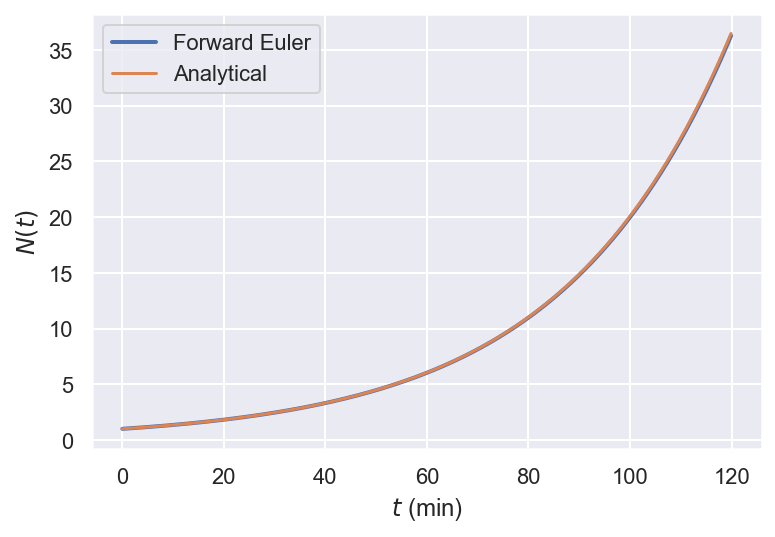

In [40]:
# exponential growth simulation
time=np.arange(num_steps) * dt
N_t[0]=N_0 # update initial cells

# forward euler
for i in np.arange(1, num_steps):
    N_t[i]=N_t[i-1]+r*dt*N_t[i-1]

# analytical
N_analytical = N_0*np.exp(r* time)

plt.figure()
plt.plot(time,N_t, label="Forward Euler", linewidth=2)
plt.plot(time,N_analytical, label="Analytical")
plt.legend()
plt.ylabel("$N(t)$")
plt.xlabel("$t$ (min)")

In [ ]:
# logistic growth simulation
N_t[0]=N_0 # update initial cells

# iterate through time
for i in np.arange(1, num_steps):
    N_t[i]=N_t[i-1]+r*dt*N_t[i-1]

plt.figure()
plt.ylabel("$N(t)$")
plt.xlabel("$t$ (min)")
plt.plot(np.arange(0,total_time,dt),N_t) # or np.arange(num_steps) * dt
plt.ylim([0,40])
plt.xlim([0,120])